In [1]:
#import all the dependencies
import json
import csv
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches 
from matplotlib import font_manager as fm
import seaborn as sns
import pycountry
import math

In [2]:
census_pd = pd.read_csv("census_data_2015.csv")
census_pd.fillna(0, inplace=True)
census_pd.head(15)
census_df = pd.DataFrame(census_pd)

In [3]:
# Functions and defualts used below

#  function to create bin
def createbin(columnToBin, tableToUpdate, binlabels, nbrofbins, newBinColumnName, newCategoryColumnName):
    tableToUpdate[newCategoryColumnName] = pd.cut(columnToBin, len(binlabels), labels=binlabels)
    tableToUpdate[newBinColumnName] = pd.cut(columnToBin, bins=nbrofbins)

# bin length to be used for default
nbrofbins = 5

# colors for plotting
colors = ['#5cbae6','#b6d957','#fac364','#8cd3ff','#d998cb','#f2d249','#93b9c6','#ccc5a8','#52bacc','#dbdb46']

In [4]:

# create bins for median age
ageGroup=[1,2,3,4,5]
createbin(census_df['Median Age'],census_df,ageGroup, [0,18,35,55,70],"ageBinned","ageCategory")


# create bins for Household Income
householdLabels= [1,2,3,4,5]
createbin(census_df['Household Income'],census_df,householdLabels, [0,60000,120000,180000,240000],"householdBinned","householdCategory")


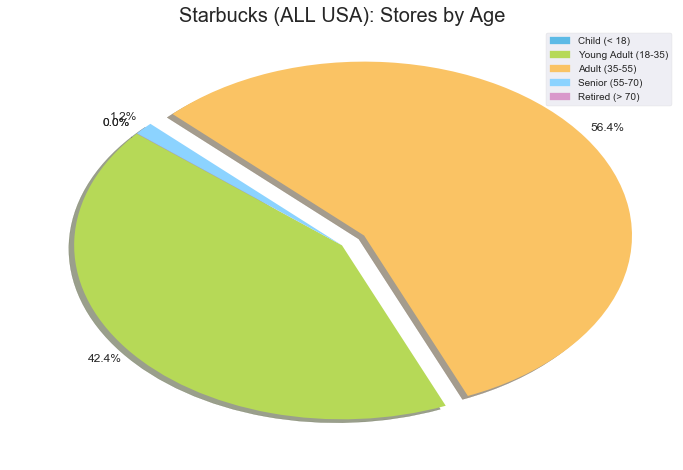

,Population
ageCategory,
1,33481
2,135809757
3,180395170
4,3789739
5,55958


In [5]:
age_group = census_df.groupby("ageCategory")['Population'].sum()
age_group
age_df = pd.DataFrame(age_group)


# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)
# Data to plot
plt.figure(figsize=(12,8))
explode = (0.0, 0.0, 0.1, 0.0, 0.0)  # explode 1st slice

ageLabels= ['Child (< 18)','Young Adult (18-35)','Adult (35-55)','Senior (55-70)','Retired (> 70)']
plt.pie(age_df['Population'],  explode=explode, colors=colors, labeldistance=1.05, 
                                  autopct='%1.1f%%', pctdistance=1.1, shadow=True, startangle=140)


patches = []
for c, l in zip(colors, ageLabels):
    patches.append(mpatches.Patch(color=c, label=l))
    

plt.legend(handles=patches, frameon=True, loc="upper right")
  
plt.title("Starbucks (ALL USA): Stores by Age", fontsize=20) 
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("ALL USA Stores by Age.png",bbox_inches='tight')

age_df

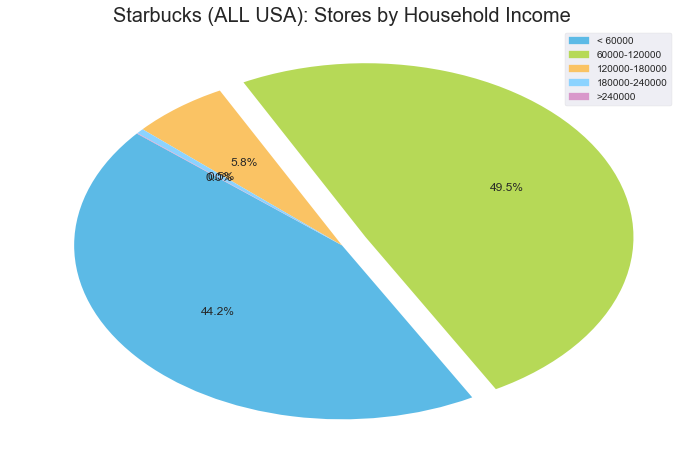

,Population
householdCategory,
1,141453541
2,158300029
3,18675799
4,1503143
5,151593


In [6]:
household_group = census_df.groupby("householdCategory")['Population'].sum()
household_group
household_df = pd.DataFrame(household_group)

# Data to plot
plt.figure(figsize=(12,8))
explode = (0.0, 0.1, 0.0, 0.0, 0.0)  # explode 1st slice

householdLabels= ['< 60000','60000-120000','120000-180000','180000-240000','>240000']
plt.pie(household_df['Population'], explode=explode, colors=colors, labeldistance=1.5, 
                                  autopct='%1.1f%%', shadow=False, startangle=140)

patches = []
for c, l in zip(colors, householdLabels):
    patches.append(mpatches.Patch(color=c, label=l))

plt.legend(handles=patches, frameon=True, loc="upper right")
    
plt.title("Starbucks (ALL USA): Stores by Household Income", fontsize=20) 
fig1 = plt.gcf()
plt.show()
plt.draw()
fig1.savefig("All USA Stores by Household Income.png",bbox_inches='tight')
household_df